In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

In [2]:
data = {
    "value": [30, 120, 150, 390, 400, 300, 500],
    "label": [0, 0, 1, 0, 0, 1, 0]
}

In [3]:
data = pd.DataFrame(data)

In [4]:
data

,value,label
0,30,0
1,120,0
2,150,1
3,390,0
4,400,0
5,300,1
6,500,0


In [5]:
# Decision Tree 구현
sorted_data = data.sort_values(by="value")
sorted_data

,value,label
0,30,0
1,120,0
2,150,1
5,300,1
3,390,0
4,400,0
6,500,0


In [6]:
sorted_data = sorted_data.reset_index(drop=True) # 인덱스 컬럼 삭제

In [7]:
sorted_data

,value,label
0,30,0
1,120,0
2,150,1
3,300,1
4,390,0
5,400,0
6,500,0


In [8]:
# 정답이 바뀌는 경계 지점 찾기
boundary = sorted_data["label"].diff() != 0

In [9]:
boundary

0     True
1    False
2     True
3    False
4     True
5    False
6    False
Name: label, dtype: bool

In [10]:
boundary[0] = False

In [11]:
boundary_idx = boundary.loc[boundary].index

In [12]:
boundary_idx

Int64Index([2, 4], dtype='int64')

In [13]:
# 경계의 평균값을 기준으로 잡음
idx_1 = boundary_idx[0]

In [14]:
data.loc[[idx_1-1, idx_1]]

,value,label
1,120,0
2,150,1


In [15]:
bound_value_1 = data.loc[[idx_1-1, idx_1], "value"].mean()

In [16]:
bound_value_1

135.0

In [17]:
# 두번째 경계 구간
idx_2 = boundary_idx[1]

In [18]:
bound_value_2 = data.loc[[idx_2-1, idx_2], "value"].mean()

In [19]:
bound_value_2

395.0

In [20]:
# 구간별 경계값 기준으로 정보 이득 계산
def gini_index(label): # 지니계수 계산
    p1 = (label == 0).mean()
    p2 = 1 - p1
    return 1 - (p1 ** 2 + p2 ** 2)

def concat_gini_index(left, right): # 두 부분을 합침
    left_gini = gini_index(left)
    right_gini = gini_index(right)
    all_num = len(left) + len(right)
    left_gini *= len(left) / all_num
    right_gini *= len(right) / all_num
    return left_gini + right_gini

In [21]:
# 135 기준
left_1 = sorted_data.loc[:idx_1 - 1, "label"]
right_1 = sorted_data.loc[idx_1:, "label"]

In [22]:
left_1

0    0
1    0
Name: label, dtype: int64

In [23]:
gini_index(right_1)

0.48

In [24]:
concat_gini_index(left_1, right_1)

0.34285714285714286

In [25]:
# 345 기준
left_2 = sorted_data.loc[:idx_2 - 1, "label"]
right_2 = sorted_data.loc[idx_2:, "label"]

In [26]:
concat_gini_index(left_2, right_2)

0.2857142857142857

In [27]:
# Decision Tree 패키지
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=1)

In [28]:
tree.fit(data["value"].to_frame(), data["label"])

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[0] <= 345.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(83.7, 54.360000000000014, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

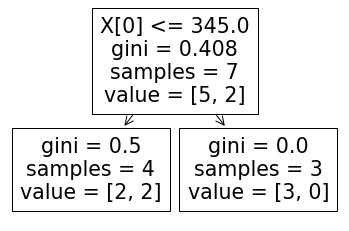

In [29]:
plot_tree(tree)